<a href="https://colab.research.google.com/github/JaZz-9/Kaggle-Notebooks/blob/master/Housing_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle Setup

In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [ ]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c home-data-for-ml-course

  0% 0.00/15.3k [00:00<?, ?B/s]
100% 15.3k/15.3k [00:00<00:00, 14.6MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 61.7MB/s]
  0% 0.00/82.0k [00:00<?, ?B/s]
100% 82.0k/82.0k [00:00<00:00, 87.1MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 12.9MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.7MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.1MB/s]
  0% 0.00/89.2k [00:00<?, ?B/s]
100% 89.2k/89.2k [00:00<00:00, 89.8MB/s]


In [ ]:
!ls

data_description.txt  sample_data		test.csv     train.csv.gz
drive		      sample_submission.csv	test.csv.gz
kaggle.json	      sample_submission.csv.gz	train.csv


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import the test and train datasets into pandas dataframe
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df_train.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

## Data Cleaning

In [ ]:
## function to get column with missing entries %

def mis_fil(data):
  total = data.isnull().sum().sort_values(ascending=False)
  percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
  ms = pd.concat([total,percent] , axis = 1, keys = ['Total', 'Percent'])
  ms0 = ms[ms['Percent']>0 ]
  f,ax = plt.subplots(figsize = (8,6))
  plt.xticks(rotation = '90')
  fig = sns.barplot(ms0.index, ms0['Percent'], color= 'green', alpha = 0.8)
  plt.xlabel = ('Feature')
  plt.ylabel = ('% of missing values')
  plt.title('Missing values Plot')
  return ms0, ms

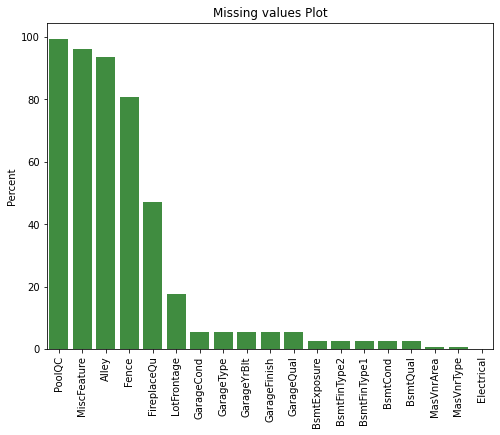

In [ ]:
## mis1 = dataframe of columns having some empty entries
mis1, mis01 = mis_fil(df_train)                         ## mis01 is other dataframe of all columns having missing values percentages [99% to 0%]

In [ ]:
mis01

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


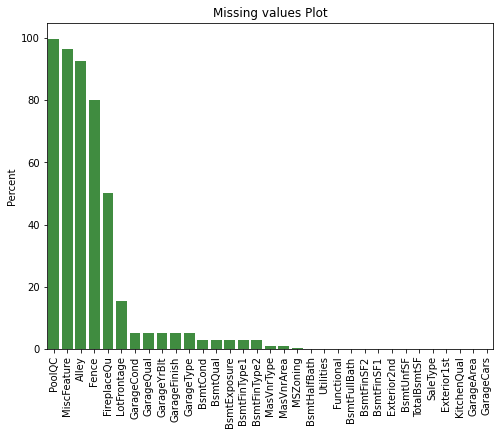

In [ ]:
## Same with test data
mis2, mis02 = mis_fil(df_test)

In [ ]:
mis02

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
...,...,...
Electrical,0,0.000000
CentralAir,0,0.000000
HeatingQC,0,0.000000
Foundation,0,0.000000


In [ ]:
mis01.reset_index(inplace = True)
# mis01
mis02.reset_index(inplace = True)
# mis02


In [ ]:
# creating bool series True for NaN values 
bool_series = pd.isnull(df_train["PoolQC"]) 
df_train[bool_series]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
## we could also remove those columns where missing vlaues > 40% of total #rows

drop_list = []
for i in range(len(mis02)):
  # print(mis01.iloc[i,2], mis02.iloc[i,2])
  if mis01.iloc[i,2] > 40 and mis02.iloc[i,2] > 40:
    # print(mis01.iloc[i,0])
    drop_list.append(mis01.iloc[i,0])

In [ ]:
drop_list

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [ ]:
df_train.drop(drop_list, axis=1, inplace = True)
df_test.drop(drop_list,axis=1,inplace=True)

In [ ]:
## filling the missing values in both the dataset

all_data = [df_train, df_test]
for data in all_data:
  list_col = list(data)
  for i in range(len(list_col)):
    col_name = list_col[i]
    # print(type(data[col_name].values))
    if data[col_name].dtype == 'object':
      data[col_name].fillna(data[col_name].mode()[0], inplace = True)
    else:  # if data[col_name].dtype == 'float64':
      data[col_name].fillna(data[col_name].median(), inplace=True)

In [ ]:
## check
df_train.isnull().sum()
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

## Feature Engineering

In [ ]:
all_data = [df_train, df_test]

for data in all_data:
  data['TotalArea'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] + data['GrLivArea'] + data['GarageArea']
  data['Bathrooms'] = data['FullBath'] + data['HalfBath'] * 0.5
  data['Year average'] = data['YearBuilt']/2 + data['YearRemodAdd']
  

In [ ]:
## One hot encoding



dftrain = pd.get_dummies(df_train.drop('SalePrice', axis = 1))
print("the shape of the original dataset", df_train.shape)
print("the shape of the encoded dataset", dftrain.shape)
print("We have ", dftrain.shape[1]- df_train.shape[1], 'new encoded features')

the shape of the original dataset (1460, 79)
the shape of the encoded dataset (1460, 78)
We have  -1 new encoded features


In [ ]:
dftest = pd.get_dummies(df_test)
print("the shape of the original dataset", df_test.shape)
print("the shape of the encoded dataset", dftest.shape)
print("We have ", dftest.shape[1]- df_test.shape[1], 'new encoded features')


the shape of the original dataset (1459, 78)
the shape of the encoded dataset (1459, 78)
We have  0 new encoded features


In [ ]:
dftrain['SalePrice'] = df_train['SalePrice']

In [ ]:
dftrain.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalArea,Bathrooms,Year average,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,3404.0,1.0,2941.5,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,208500
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,4299.0,1.5,2937.0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,181500


## Analysing correlations between features  
skip this!

> Indented block



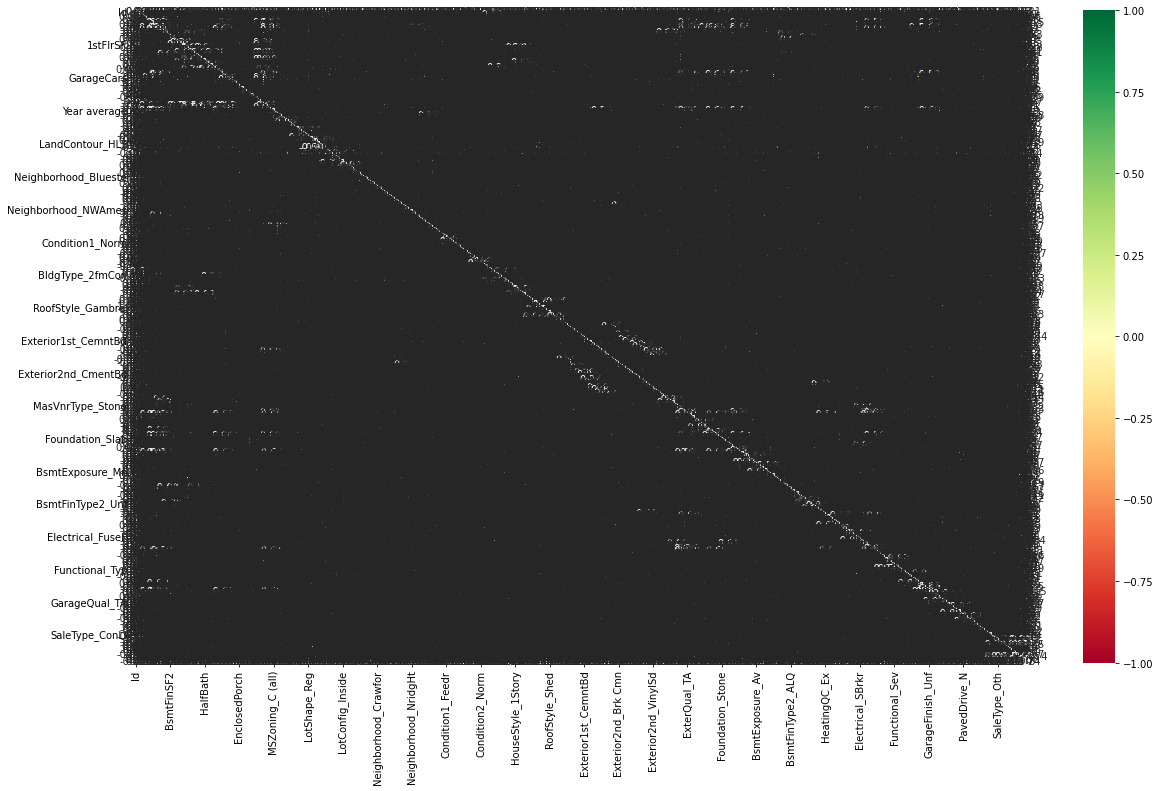

In [ ]:
sns.heatmap(dftrain.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

##awwful

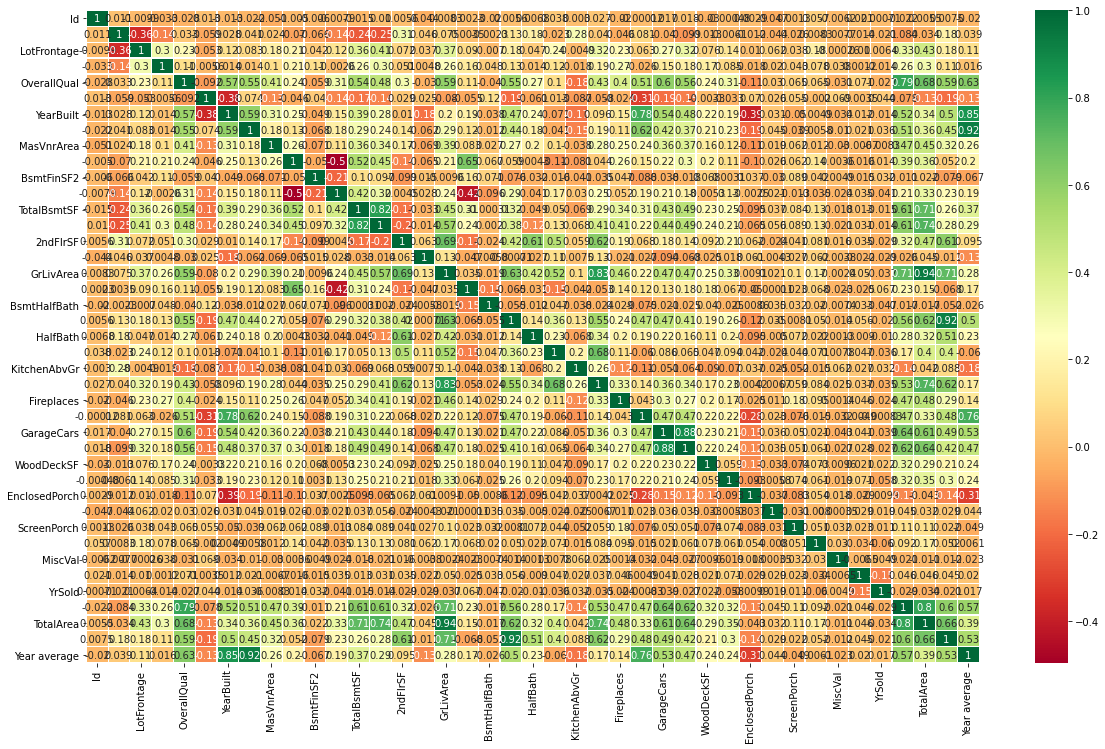

In [ ]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [ ]:
## Label Encoding

from sklearn.preprocessing import LabelEncoder 

all_data = [df_train, df_test]
for data in all_data:
  list_col = list(data)
  for i in range(len(list_col)):
    col_name = list_col[i]
    # print(type(data[col_name].values))
    if data[col_name].dtype == 'object':
      LE = LabelEncoder() 
      data[col_name] = LE.fit_transform(data[col_name].values)

In [ ]:
from sklearn.model_selection import train_test_split
all_features = df_train.drop('SalePrice', axis=1)
target = df_train['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(all_features,target,test_size=0.3,random_state=42)
print(X_train.shape, y_train.shape)

(1022, 78) (1022,)


In [ ]:
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,Bathrooms,Year average
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500,4824,2.5,3004.5
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500,4246,2.0,2964.0


## ML Algos
1. Random Forest
2. Decision Tree
3. Graadient Boosting
4. adaptive Boosting
with Grid Search (tuned hyperparamters)

### Random Forest + grid search

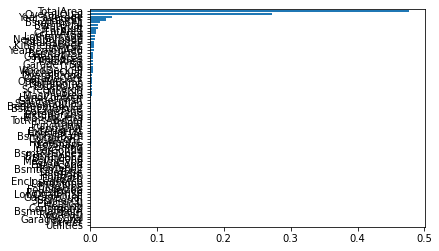

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR
rf = RFR()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
pd.Series(rf.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8) 
importance = pd.Series(rf.feature_importances_,X_train.columns).sort_values(ascending=True)

In [ ]:
importance

Utilities       2.634247e-08
Street          7.364098e-06
GarageCond      2.240486e-05
MiscVal         5.015903e-05
RoofMatl        8.917844e-05
                    ...     
BsmtFinSF1      1.540490e-02
2ndFlrSF        2.348497e-02
Year average    3.329439e-02
OverallQual     2.715458e-01
TotalArea       4.766526e-01
Length: 78, dtype: float64

In [ ]:
acc_rf = round(rf.score(X_train, y_train) * 100)
print("aCcuracy on train data: " + str(acc_rf))

aCcuracy on train data: 98.0


In [ ]:
acc_rf = round(rf.score(X_test, y_test) * 100)
print("aCcuracy on val data: " + str(acc_rf))

aCcuracy on val data: 90.0


In [ ]:
## Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators' : [200,300,400,500],
              'max_features' : [0.7, 0.5, 0.3, 0.1]}

scoring = make_scorer(r2_score)
model_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid = param_grid, scoring = scoring, cv= 10, refit = True )
model_rf.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [ ]:
pred_modelrf = model_rf.predict(X_test)
acc_modelrf  = model_rf.score(X_test, y_test)
mse_model_rf = np.mean((y_test - pred_modelrf)**2)

print('------------Random Forest Regression Grid Search--------------')
print('Mean Squared Error : ' + str(mse_model_rf), '\nAccuracy : ' + str(acc_modelrf))

------------Random Forest Regression Grid Search--------------
Mean Squared Error : 642483973.8884751 
Accuracy : 0.9079284406459462


In [ ]:
model_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# model prediction on test data
rf_final_pred = model_rf.predict(df_test)
# make a submission file
submissions = pd.DataFrame({'Id': df_test.Id, 'SalePrice': rf_final_pred})
submissions.to_csv("my_submission1_housing_prices.csv", index=False, header=True)
# submit the file to kaggle
!kaggle competitions submit home-data-for-ml-course -f my_submission1_housing_prices.csv -m "Random Forest!"

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_features' : [0.7, 0.5, 0.3, 0.1]}

scoring = make_scorer(r2_score)
model_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                        param_grid = param_grid, 
                        scoring = scoring, 
                        cv= 10, 
                        refit = True )
model_dt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [0.7, 0.5, 0.3, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(r2_score), verbose=0)

In [ ]:
pred_modeldt = model_dt.predict(X_test)
acc_modeldt  = model_dt.score(X_test, y_test)
mse_modeldt = np.mean((y_test - pred_modeldt)**2)

print('------------ Decision Tree Regression Grid Search--------------')
print('Mean Squared Error : ' + str(mse_modeldt), '\nAccuracy : ' + str(acc_modeldt))

------------ Decision Tree Regression Grid Search--------------
Mean Squared Error : 1362330097.2671232 
Accuracy : 0.8047704510803617


### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

param_grid = {'loss' : ['ls'],
              'n_estimators' : [100,200, 300, 400, 500],
              'learning_rate': [0.1, 0.05,0.01],
              'max_features' : [0.7, 0.5, 0.3, 0.1]
              }

model = GBR(random_state = 42)
scoring = make_scorer(r2_score)
model_gbr = GridSearchCV(model, 
                        param_grid = param_grid, 
                        scoring = scoring, 
                        cv= 10, 
                        refit = True )
model_gbr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [ ]:
pred_gbr = model_gbr.predict(X_test)
acc_gbr  = model_gbr.score(X_test, y_test)
mse_gbr  = np.mean((y_test- pred_gbr)**2)

print('----------------------- Gradient Boost Grid Sarch ----------------')
print('Accuracy : '+ str(acc_gbr) + '\nMSE : ' + str(mse_gbr) )

----------------------- Gradient Boost Grid Sarch ----------------
Accuracy : 0.917376395420144
MSE : 576555259.6250095


In [ ]:
model_gbr.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=0.1, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# model prediction on test data
gbr_final_pred = model_gbr.predict(df_test)
# make a submission file
submissions = pd.DataFrame({'Id': df_test.Id, 'SalePrice': gbr_final_pred})
submissions.to_csv("my_submission1_housing_prices.csv", index=False, header=True)
# submit the file to kaggle
!kaggle competitions submit home-data-for-ml-course -f my_submission1_housing_prices.csv -m "Gradient Boosting!"

100% 33.6k/33.6k [00:01<00:00, 17.9kB/s]
Successfully submitted to Housing Prices Competition for Kaggle Learn Users

### AdaBoost



In [ ]:
from sklearn.ensemble import AdaBoostRegressor as ABR


model = ABR(random_state = 42) 

param_grid = {
              'n_estimators' : [100,200, 300, 400, 500],
              'learning_rate': [0.1, 0.05,0.01]
              }

scoring = make_scorer(r2_score)
model_abr = GridSearchCV(model, 
                        param_grid = param_grid, 
                        scoring = scoring, 
                        cv= 10, 
                        refit = True )
model_abr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(r2_score), verbose=0)

In [ ]:
pred_abr = model_abr.predict(X_test)
acc_abr  = model_abr.score(X_test, y_test)
mse_abr  = np.mean((y_test- pred_abr)**2)

print('----------------------- Adaptive Boosting Grid Sarch ----------------')
print('Accuracy : '+ str(acc_abr) + '\nMSE : ' + str(mse_abr) )

----------------------- Adaptive Boosting Grid Sarch ----------------
Accuracy : 0.8573488446084413
MSE : 995433137.4286187


In [ ]:
# model prediction on test data
abr_final_pred = model_abr.predict(df_test)
# make a submission file
submissions = pd.DataFrame({'Id': df_test.Id, 'SalePrice': abr_final_pred})
submissions.to_csv("my_submission1_housing_prices.csv", index=False, header=True)
# submit the file to kaggle
!kaggle competitions submit home-data-for-ml-course -f my_submission1_housing_prices.csv -m "Adaptive Boosting!"

100% 33.2k/33.2k [00:02<00:00, 16.8kB/s]
Successfully submitted to Housing Prices Competition for Kaggle Learn Users

## ML models with Dummies added dataset
Hyperparamter tuming

Linear Regression with  regularizations: 
ridge, 
elastic_net, 
lasso. 
Other ML algos like Random Forest giving high error with the dataset added dummy variables. 
and regularizations dont work well if outliers are present..



---



### Handling Outliers

In [ ]:
Train = dftrain

In [ ]:
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]

print('We removed ',Train.shape[0]- train.shape[0],'outliers')

We removed  3 outliers


In [ ]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


In [ ]:
target=df_train[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [ ]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

In [ ]:
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)

### Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

all_features = dftrain
target = df_train.SalePrice
x_train,x_test,y_train,y_test = train_test_split(all_features,target ,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1022, 78), (438, 78), (1022,), (438,))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc  = r2_score(y_test, lr_pred)
lr_mse  = np.mean((y_test-lr_pred)**2)

In [ ]:
print('------------Linear Regression--------------')
print('Mean Squared Error : ' + str(lr_mse), '\nAccuracy : ' + str(lr_acc))

------------Linear Regression--------------
Mean Squared Error : 1089634559.5353096 
Accuracy : 0.8438492521217377


### Ridge Regularization

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)


The best value of Alpha is:  {'alpha': 66}


In [ ]:
from sklearn.metrics import mean_squared_error as MSE

ridge_mod=Ridge(alpha=66)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)
acc_ridge  = ridge_mod.score(x_test, y_test)
print('-------------------Ridge Regression-----------------')
print('Accuracy : ' + str(acc_ridge))
print('Root Mean Square Error train = ' + str(math.sqrt(MSE(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(MSE(y_test, y_pred_test))))


-------------------Ridge Regression-----------------
Accuracy : 0.8500511133375845
Root Mean Square Error train = 31048.357657532466
Root Mean Square Error test = 32347.447974744417


In [ ]:
import math
print("The best score achieved with Alpha=66 is: ",math.sqrt(-ridge_reg.best_score_))
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best score achieved with Alpha=66 is:  37663.206704791875


In [ ]:
# model prediction on test data
ridge_pred = ridge_mod.predict(df_test)
# make a submission file
submissions = pd.DataFrame({'Id': df_test.Id, 'SalePrice': ridge_pred})
submissions.to_csv("my_submission1_housing_prices.csv", index=False, header=True)
# submit the file to kaggle
!kaggle competitions submit home-data-for-ml-course -f my_submission1_housing_prices.csv -m "Ridge Regression!"

100% 33.6k/33.6k [00:01<00:00, 20.0kB/s]
Successfully submitted to Housing Prices Competition for Kaggle Learn Users

### Lasso Regularization

In [ ]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[x for x in range(1,101)]}

lasso=Lasso()
lasso_reg=GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)


In [ ]:
lasso_mod=Lasso(alpha=100)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(MSE(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(MSE(y_test, y_lasso_test))))

Root Mean Square Error train = 71326.3582115301
Root Mean Square Error test = 86965.24598661246


In [ ]:
### LASSO NOT WORKING!!!!!!!!!!!!!.

### RF with high error

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc  = r2_score(y_test, rf_pred)
rf_mse  = np.mean((y_test-rf_pred)**2)
print('------------Random Forest Regression--------------')
print('Mean Squared Error : ' + str(rf_mse), '\nAccuracy : ' + str(rf_acc))

------------Random Forest Regression--------------
Mean Squared Error : 6591383171.728045 
Accuracy : -0.060809125547022225


In [ ]:
## HyperParameter Tuning:

from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
param_grid = {'n_estimators' : [200,300,400,500],
              'max_features' : [0.7, 0.5, 0.3, 0.1]}

scoring = make_scorer(r2_score)
model_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid = param_grid, scoring = scoring, cv= 10, refit = True )

In [ ]:
model_rf.fit(x_train, y_train)
pred_modelrf = model_rf.predict(x_test)
acc_modelrf  = model_rf.score(x_test, pred_modelrf)
mse_model_rf = np.mean((y_test - pred_modelrf)**2)

In [ ]:

print('------------Random Forest Regression Grid Search--------------')
print('Mean Squared Error : ' + str(mse_model_rf), '\nAccuracy : ' + str(acc_modelrf))

------------Random Forest Regression Grid Search--------------
Mean Squared Error : 6448057633.479187 
Accuracy : 1.0


## Final Preds!

In [ ]:
# model prediction on test data
rf_final_pred = model_rf.predict(df_test)

In [ ]:
# make a submission file
submissions = pd.DataFrame({'Id': df_test.Id, 'SalePrice': rf_final_pred})
submissions.to_csv("my_submission1_housing_prices.csv", index=False, header=True)

In [ ]:
submissions.head()

,Id,SalePrice
0,1461,125973.445
1,1462,159213.035
2,1463,186565.435
3,1464,187828.945
4,1465,207246.475


In [ ]:
# submit the file to kaggle
!kaggle competitions submit home-data-for-ml-course -f my_submission1_housing_prices.csv -m "Yeah! I submit my file through the Google Colab!"

100% 21.7k/21.7k [00:00<00:00, 23.0kB/s]
Successfully submitted to Housing Prices Competition for Kaggle Learn Users